In [1]:
from ppo import PPOAgent
import torch
import gym
import matplotlib
import random as rand
import matplotlib.pyplot as plt

In [2]:
env= gym.make('CartPole-v0')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
agent = PPOAgent(state_size=env.observation_space.shape[0],
                 action_size=env.action_space.n, 
    # This argument, in conjunction with worker_index, sets the random seed of
    # each worker, so that identically configured trials will have identical
    # results. This makes experiments reproducible.
                 seed=0, 
                 hidden_layers=[64,64],
                 lr_policy=1e-4, 
                 use_reset=True,
                 device=device)

In [3]:
agent.policy.load_state_dict(torch.load('policy_cartpole.pth', map_location=lambda storage, loc: storage))

<All keys matched successfully>

In [4]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [5]:
# function to animate a list of frames
def animate_frames(frames):
    plt.axis('off')
    cmap = None if len(frames[0].shape)==3 else 'Greys'
    patch = plt.imshow(frames[0], cmap=cmap)  

    fanim = animation.FuncAnimation(plt.gcf(), \
        lambda x: patch.set_data(frames[x]), frames = len(frames), interval=50)
    
    return fanim

In [6]:
def play(env, policy, time):
    frame1 = env.reset()
    
    anim_frames = []
    
    for i in range(time):
        
        anim_frames.append(env.render(mode='rgb_array'))
        frame_input = torch.from_numpy(frame1).unsqueeze(0).float().to(device)
        action = policy.act(frame_input)['a'].cpu().numpy()
        #for j in range (1):
        #    env.step(int(action))
        frame1, _, is_done, _ = env.step(int(action))

        if is_done:
            print("reward :", i+1)
            break
    
    env.close()
    
    return animate_frames(anim_frames)

2021-11-17 23:53:13.274 Python[11576:449718] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/yt/3gz8yy8s1ks3w9hgqhvppyyc0000gn/T/org.python.python.savedState


reward : 187


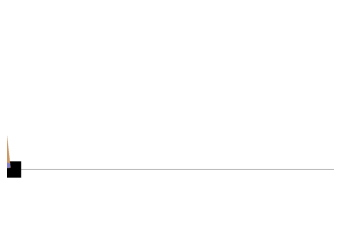

In [7]:
play(env, agent.policy, 300)